# Finite Difference Methods

In this notebook, we will explore finite differences methods applied to initial value problems, which are referred to as **marching schemes** that step through time to solve ODEs or PDEs. 

Consider the first order ODE:
$$ \frac{dy}{dt} = f(t,y) $$
which is a differential equation for $y(t)$, and where $f(t,y)$ is called the derivative function and $y(t_{0}) = y_{0}$ is the initial condition.

***

## Forward Euler

The **Forward Euler** finite difference scheme is an explicit marching scheme, with the form:

$$ \frac{y_{i+1} - y_{i}}{\Delta t} = f(t_{i}, y_{i}) $$

or, rearranging:

$$ y_{i+1} = y_{i} + \Delta t f(t_{i}, y_{i}) $$

This scheme is explicit because the solution for $y_{i+1}$ is only dependent on the values of $y$ for times prior to $i+1$, e.g., $i$.

In the code blocks below, develop code to solve the first order ODE $\frac{dy}{dt} = -y$.

1. Identify the derivative function.
1. Define the start and end times, $t_{0}$ and $t_{N}$. 
1. Define the initial condition, $y_{0}$.
1. Define the discretization of time, $t$, by defining the number of nodes, $N$.
1. Calculate $\Delta t$.
1. Write a loop to march (step) through the nodes ($t_{0}:\Delta t:t_{N}$) and solve the Forward Euler equation for the value of $y_{i+1}$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
"""

:param f: derivative function f(y,t)
:param t0: interval start
:param tN: interval end
:param y0: initial condition
:param N: number of nodes
:return: y: computed solution; t: independent variable
"""

t0 = 0
tN = 10
y0 = 1
N = 101
# f = -y # the derivative function

In [12]:
dt = np.abs(tN-t0)/(N-1)
print('dt = ', dt)
yi = y0 # initial condition
ti = t0 # initial start

y = np.zeros([N]) # initialize arrays
t = np.zeros([N])
y[0] = yi
t[0] = ti

for i in range(1, N):
    # Advance the node
    tn = ti+dt # the subscript n denotes (i+1) and the subscript i denotes (i) in the Forward Euler equation
    # Solve for y_{i+1}
    yn = yi+dt*(-yi) 
    
    t[i] = tn
    y[i] = yn
    
    # Reset for next loop
    ti = tn
    yi = yn

dt =  0.1


Let's plot the results of our solution for $y(t)$.

Text(0, 0.5, 'y(t)')

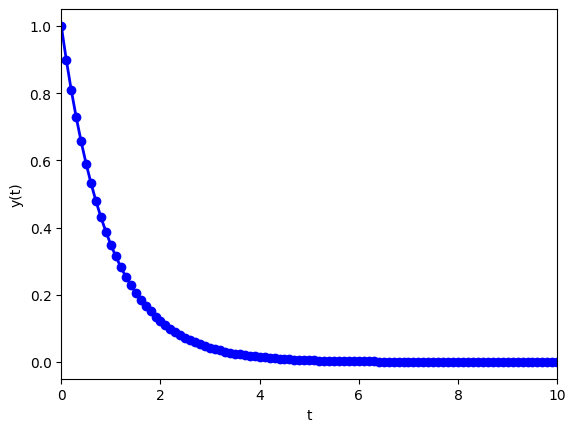

In [13]:
fig, ax = plt.subplots(1)
ax.plot(t, y, '-o', c='b', linewidth=2)
ax.set_xlim([0, 10])
ax.set_xlabel('t')
ax.set_ylabel('y(t)')

Now let's evaluate the numerical stability of the solution for different values of $\Delta t$. First, we will develop a generic function to solve an arbitrary first order ODE $\frac{du}{dt} = f(u,t)$ using a Forward Euler marching scheme. Note: we use Python's inline lambda function to define our derivative function. Matlab has similar functionality.

In [14]:
def forward_euler(f, a, b, ua, n):
    """
    
    :param f: derivative function, defined as a lambda function, see comment above
    :param a: independent variable start
    :param b: independent variable end
    :param ua: initial condition
    :param n: number of nodes
    :return: u: computed solution; t: independent variable
    """
    
    dh = np.abs(b-a)/(n-1)
    print('dt = ', dh)
    ui = ua # initial condition
    ti = a # initial start
    
    u = np.zeros([n]) # initialize arrays
    t = np.zeros([n])
    u[0] = ui
    t[0] = ti
    
    for i in range(1, n):
        # Advance the node
        tn = ti+dh
        # Solve for next step
        un = ui+dh*(f(ui))
        
        t[i] = tn
        u[i] = un
        
        # Reset for next loop
        ti = tn
        ui = un
        
    return u, t

Now, we can call this generic function with different values of $N$ to evaluate the solution of the first order ODE above $\frac{dy}{dt} = -y$ for different values of $\Delta t$. We also can compare now to the analytical solution for this ODE, $y(t) = e^{-t}$.

dt =  0.05025125628140704
dt =  0.10101010101010101
dt =  0.13513513513513514
dt =  0.20408163265306123
dt =  0.43478260869565216
dt =  1.0
dt =  1.6666666666666667


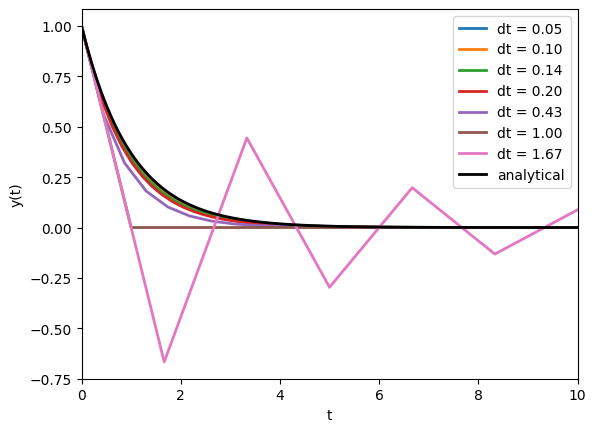

In [15]:
f = lambda y: -y
t0 = 0
tN= 10
y0 = 1

fig, ax = plt.subplots(1)
for N in [200, 100, 75, 50, 24, 11, 7]:
    u, t = forward_euler(f, t0, tN, y0, N)
    ax.plot(t, u, '-', linewidth=2, label='dt = '+"{:.2f}".format(np.abs(tN-t0)/(N-1)))

# analytical solution
t = np.linspace(t0, tN, 100)
ax.plot(t, np.exp(-t), '-', color='k', linewidth=2, label='analytical')

ax.set_xlim([0, 10])
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()

Describe the results of the numerical stability experiment here:



***

## Backward Euler

The **Backward Euler** finite difference scheme is an implicit marching scheme, with the form:

$$ \frac{y_{i+1} - y_{i}}{\Delta t} = f(t_{i+1}, y_{i+1}) $$

or, rearranging:

$$ y_{i+1} = y_{i} + \Delta t f(t_{i+1}, y_{i+1}) $$

This scheme is implicit because the solution for $y_{i+1}$ is dependent on the values of $y$ at the current time, $i+1$. Because of the implicit nature of the solution, we require additional numerical methods (e.g., Newton-Raphson method) to iteratively arrive at the solution at each step.

In the code blocks below, develop a generic function to solve an arbitrary first order ODE $\frac{du}{dt} = f(u,t)$ using a Backward Euler marching scheme.

In [ ]:
def backward_euler(f, df, a, b, ua, n, tol=0.01):
    """
    
    :param f: derivative function, defined as a lambda function, see comment above
    :param df: derivative of the derivative function with respect to the dependent variable, defined as a lambda function, see comment above
    :param a: independent variable start
    :param b: independent variable end
    :param ua: initial condition
    :param n: number of nodes
    :param tol: tolerance for solving Newton-Raphson method
    :return: u: computed solution; t: independent variable
    """
    
    dh = np.abs(b-a)/(n-1)
    print('dt = ', dh)
    ui = ua # initial condition
    ti = a # initial start
    
    u = np.zeros([n]) # initialize arrays
    t = np.zeros([n])
    u[0] = ui
    t[0] = ti
    
    for i in range(1, n):
        # Advance the node
        tn = ti+dh
        
        # Solve for next step iteratively
        dsol = 0.1 # error in the solution
        while dsol > tol:
            un = ui-(f(ui)*dh+u[i-1]-ui)/(df(ui)*dh-1)
            dsol = np.abs(un-ui)
            ui = un            
        
        t[i] = tn
        u[i] = un
        
        # Reset for next loop
        ti = tn
        
    return u, t

Now let's investigate the solution to the first order ODE above $\frac{dy}{dt} = -y$ for different values of $\Delta t$, as we did for the Forward Euler method:

Describe the results of the numerical stability experiment here:



***

## Weighted Euler Method

The **Weighted Euler** scheme combines the Forward and Backward Euler methods in the form:

$$  y_{i+1} = y_{i} + \Delta t [\theta f(t_{i+1},y_{i+1}) + (1-\theta)f(t_{i},y_{i})] $$

where $0 \le \theta \le 1$, such that for $\theta = 0$ and $\theta = 1$, this formulation reduces to a Forward or Backward Euler method, respectively.

***

## Corrected Euler Method

While the Forward, Backward, and Weighted Euler schemes are simple from a computational point of view, they are first-order approximations and thus have relatively large errors. A common scheme which has second-order accuracy, the simplicity of the Forward Euler scheme, and the stability of the Backward Euler scheme is the **Corrected Euler** scheme (also referred to as the Modified Euler scheme), with the form:

$$ y_{*} = y_{i} + \Delta t f(t_{i},y_{i} $$
$$ y_{i+1} = y_{i} + \frac{\Delta t}{2}[f(t_{i},y_{i}) + f(t_{i+1},y_{*})] $$

Note that the approximation of $y_{*}$ is the Forward Euler method.

Unlike the methods previously discussed, the Corrected Euler method is a two stage method. Two separate calculations are made to obtain the solution for $y_{i+1}$. These types of multi-stage methods are also referred to as Predictor-Corrector methods.

In the code blocks below, develop a generic function to solve an arbitrary first order ODE $\frac{du}{dt} = f(u,t)$ using a Corrected Euler marching scheme.

Now let's investigate the solution to the first order ODE above $\frac{dy}{dt} = -y$ for different values of $\Delta t$, as we did for the other methods:

***

## Runge-Kutta Methods

Runge-Kutta (R-K) methods are a more accurate and stable class of single step, multi-stage marching schemes. Here, we develop the two-stage and four-stage R-K schemes.

### Four-stage R-K Method 

The four-stage R-K method is a fourth-order approximation with predictor-corrector stages in the form:

$$ y_{*} = y_{i} + (\frac{\Delta t}{2})f_{i} $$
$$ y_{**} = y_{i} + (\frac{\Delta t}{2})f_{*} $$
$$ y_{***} = y_{i} + \Delta t f_{**} $$
$$ y_{i+1} = y_{i} + (\frac{\Delta t}{6})[f_{i} + 2f_{*} + 2f_{**} + f_{***}] $$

where
$$ f_{*} = f(t_{i} + \frac{\Delta t}{2}, y_{*}) $$
$$ f_{**} = f(t_{i} + \frac{\Delta t}{2}, y_{**}) $$
$$ f_{***} = f(t_{i} + \Delta t, y_{***}) $$

In the code blocks below, develop a generic function to solve an arbitrary first order ODE $\frac{du}{dt} = f(u,t)$ using a four-stage R-K method!